# 3/3 We display the data in HTML maps and save it locally.

## Weather with locations

In [38]:
df_locations_weather = pd.read_csv(r'./csv/df_locations_weather.csv')
df_locations_weather.head()

,Id,location,pop,perceived_temperature,display_name,lat,lon
0,0,Aigues Mortes,25,16,"Aigues-Mortes, Nîmes, Gard, Occitanie, France ...",43.565823,4.191284
1,1,Aix en Provence,15,15,"Aix-en-Provence, Bouches-du-Rhône, Provence-Al...",43.529842,5.447474
2,2,Amiens,33,12,"Amiens, Somme, Hauts-de-France, France métropo...",49.894171,2.295695
3,3,Annecy,24,10,"Annecy, Haute-Savoie, Auvergne-Rhône-Alpes, Fr...",45.899235,6.128885
4,4,Ariege,23,7,"Ariège, Occitanie, France métropolitaine, France",42.945537,1.406554


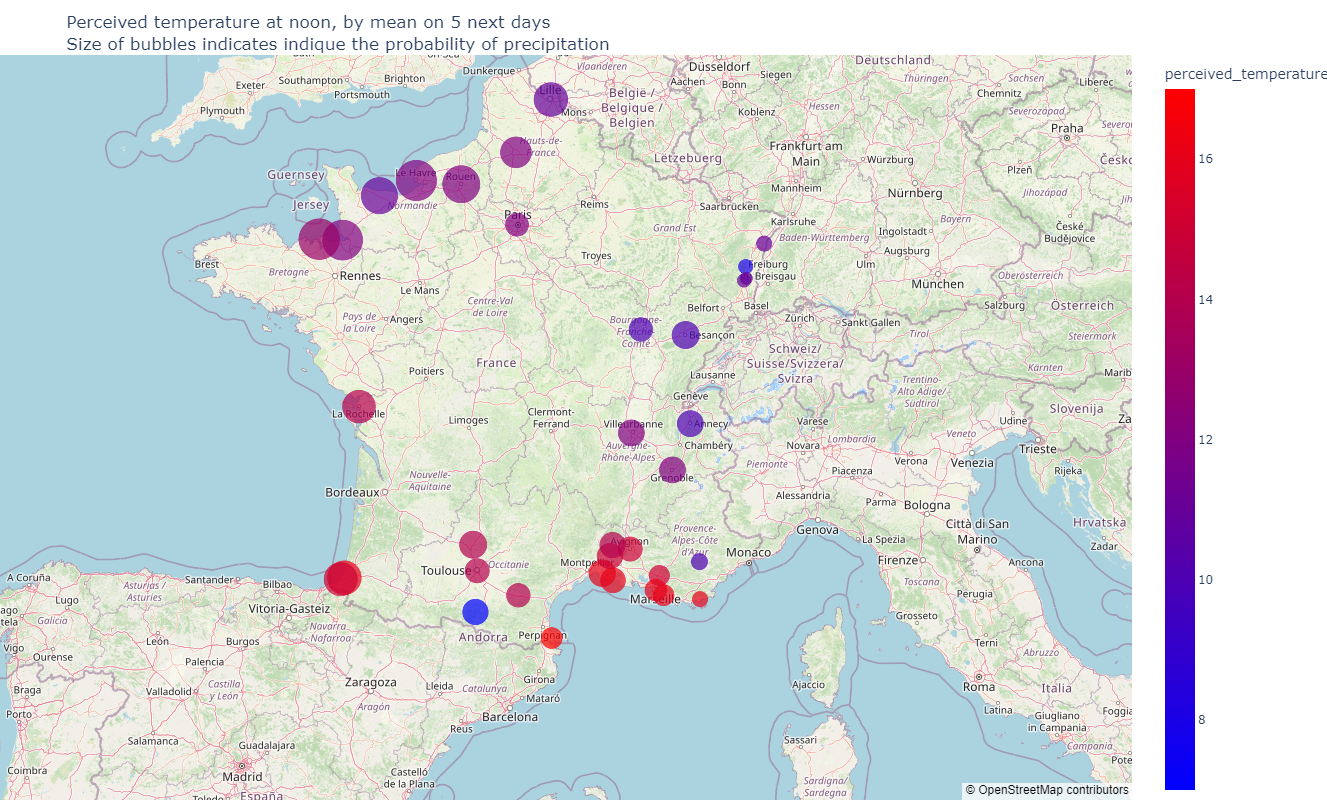

In [39]:
fig = px.scatter_mapbox(df_locations_weather, lat=df_locations_weather['lat'], lon=df_locations_weather['lon'], zoom=5, mapbox_style="open-street-map", hover_name='location', color = 'perceived_temperature', color_continuous_scale="bluered",  size='pop', 
                 width=800, height=800, title='Perceived temperature at noon, by mean on 5 next days<br>Size of bubbles indicates indique the probability of precipitation', size_max=30)
fig.update_layout(margin={"r":0,"t":55,"l":0,"b":0})
fig.write_html(r"./html/Weathers.html")
fig.show()

In [13]:
!pip install folium

## Best hotels with locations

In [40]:
import folium
import pandas as pd

df_hotels = pd.read_csv(r'./csv/df_hotels.csv')
m = folium.Map(location=[47, 2.47], zoom_start=6, width='70%', height='70%')
title_html = '<h3 align="center" style="font-size:16px"><b>List of 25 best hotels per destination<br>The color of bubbles indicates the hotel score on booking.com</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

def get_icon_color(hotel_score):
    if hotel_score == 10:
        return "darkred"
    if hotel_score > 9.5:
        return "red"
    if hotel_score > 90:
        return "lightred"
    return "orange"

for i, hotel in enumerate(df_hotels.itertuples()):
    marker = folium.Marker(
        [hotel.lat, hotel.lon]
        , popup=f"<a href={hotel.url}>Cliquez pour aller sur Booking.com</a>"
        , tooltip=f"{hotel.title} - {hotel.score} / 10"
        , icon=folium.Icon(color=get_icon_color(hotel.score),icon="hotel", prefix='fa')
    )
    marker.add_to(m)

m.save('./html/Hotels_folium.html')
m